# Solving ODEs with SciPy
Gilbert François Duivesteijn

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Example: Radioactive decay

Radioactive decay is described as:

\begin{align}
\frac{dC}{dt} = -\frac{C}{\tau}
\end{align}

The exact solution is:
\begin{align}
C(t) = C_0 e^{\frac{-t}{\tau}},
\end{align}
where $C_0$ is the initial condition. 

Solve this problem numerically with $\tau = 1$, $C_0 = 1$ and $t_{end} = 5$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
# times
t = np.linspace(0, 5, 200)

# initial condition
C0 = 1.0

# Constant
tau = 1.0

In [4]:
# Right hand side of function (1)

def fn(C, t, tau):
    return -C / tau

In [5]:
# Numerical solution

C_num = odeint(fn, C0, t, args=(tau,))

In [6]:
# Analytical solution

C_exact = C0 * np.exp(-t/tau)

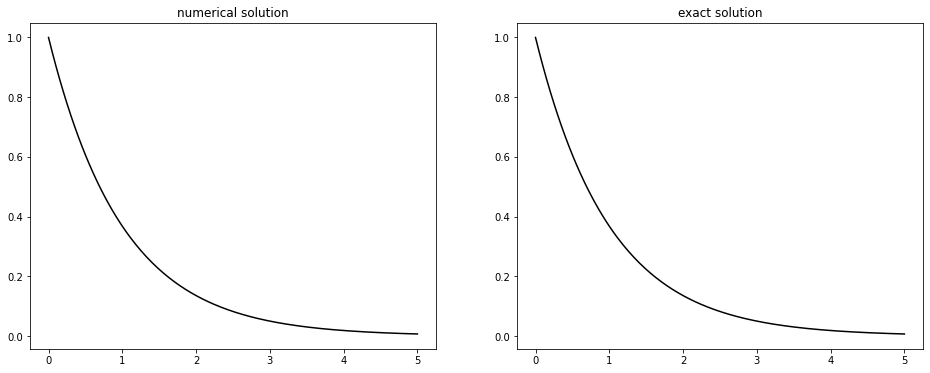

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(t, C_num, label="numerical solution", c="black")
axs[1].plot(t, C_exact, label="exact solution", c="black")
axs[0].set_title("numerical solution")
axs[1].set_title("exact solution")
plt.show()

## Example 2: Rate equation

Solve the rate equation for $v(t)$ and plot the result.

\begin{align}
\frac{dv}{dt} = g - cv^2
\end{align}
with gravitational acceleration $g = 9.81$, drag coefficient $c = 1$, initial velocity $v_0 = 0$.


In [8]:
# time

t = np.linspace(0, 2, 200)

# gravitational acceleration
g = 9.81

# drag coefficient
c = 1

# initial velocity
v0 = 0

In [9]:
def fn(v, t, g, c):
    return g - c*v**2

In [10]:
v_num = odeint(fn, v0, t, args=(g, c))

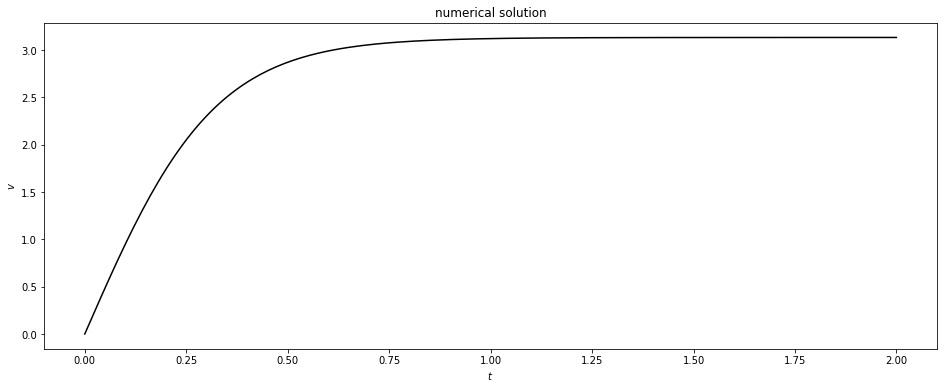

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
axs.plot(t, v_num, label="numerical solution", c="black")
axs.set_title("numerical solution")
axs.set_ylabel("$v$")
axs.set_xlabel("$t$")
plt.show()

## Example 3: Multiple equations

We have multiple rate equations in multiple unknowns, we solve the problem in the same way, using vector notation:

\begin{align}
\frac{dx}{dt} &= v,\\
\frac{dv}{dt} &= g - cv^2.
\end{align}

In [12]:
# time

t = np.linspace(0, 2, 200)

# gravitational acceleration
g = 9.81

# drag coefficient
c = 1

# initial velocity and position
X0 = np.array([0.0, 0.0])

In [13]:
def fn(X, t, g, c):
    x = X[0]
    v = X[1]
    dxdt = v
    dvdt = g - c*v**2
    return np.array([dxdt, dvdt])

In [14]:
X_num = odeint(fn, X0, t, args=(g, c))

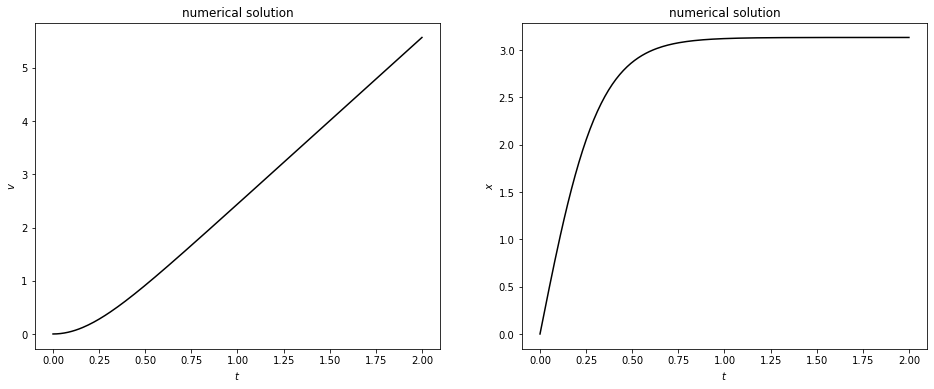

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(t, X_num[:,0], label="numerical solution", c="black")
axs[0].set_ylabel("$v$")
axs[0].set_xlabel("$t$")
axs[0].set_title("numerical solution")

axs[1].plot(t, X_num[:,1], label="numerical solution", c="black")
axs[1].set_title("numerical solution")
axs[1].set_ylabel("$x$")
axs[1].set_xlabel("$t$")
plt.show()